We start with decision trees. It works exactly the same way as with classification, splitting by information gain per feature, with entorpy as a criteria or Gini for classification. The choice of split is dictated by the maximal information gain, but for regression, the MSE is used. In this case, the MSE is known as the within-node variance. The splitting criteria is also known as variance reduction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# We will use the AMES housing dataset by Dean De Cock

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t') # Tab separated
# This is unnecessarily large, so let's pick out a subset of 5 variables, along wit the target
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = df[columns]

# There is only one missing entry. Let's drop that row, since we have a large enough dataset
df = df.dropna(axis=0)
# Let's encode the central air conditioning variable
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [3]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [5]:
import os

original_dir = os.getcwd()
os.chdir('..')

from regression_plotting import RegressionFitPlotter
os.chdir(original_dir)

rfp = RegressionFitPlotter()

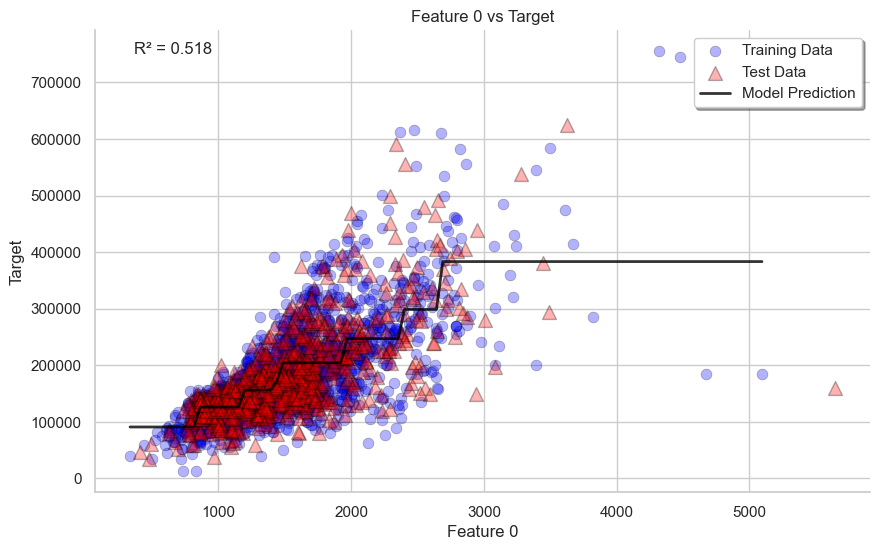

In [6]:
rfp.plot_feature_vs_target(X_train, y_train, feature_index=0, 
                      regressor=tree, X_test=X_test, y_test=y_test, scatter_alpha=0.3, line_color='black')
plt.show()

In [7]:
print(f"MSE\ntrain: {mean_squared_error(y_train, tree.predict(X_train)):.3f}, test: {mean_squared_error(y_test, tree.predict(X_test)):.3f}")
print(f"MAE\ntrain: {mean_absolute_error(y_train, tree.predict(X_train)):.3f}, test: {mean_absolute_error(y_test, tree.predict(X_test)):.3f}")
print(f"R^2\ntrain: {r2_score(y_train, tree.predict(X_train)):.3f}, test: {r2_score(y_test, tree.predict(X_test)):.3f}")

MSE
train: 3131611482.417, test: 3177100295.697
MAE
train: 38971.564, test: 39682.192
R^2
train: 0.518, test: 0.480


This is clearly a weak predictor, only explaining about half the variance in the target.

In [8]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=42,
                               n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

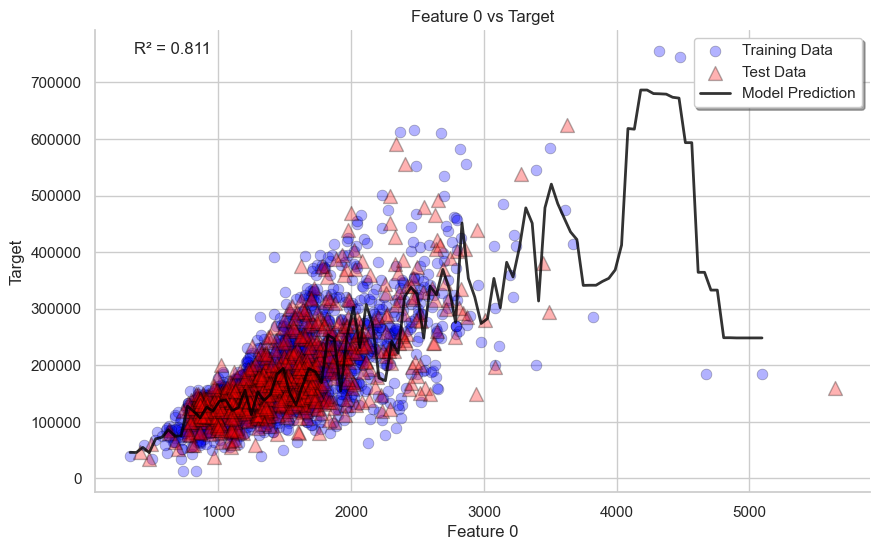

In [9]:
rfp.plot_feature_vs_target(X_train, y_train, feature_index=0, 
                      regressor=forest, X_test=X_test, y_test=y_test, scatter_alpha=0.3, line_color='black')
plt.show()

In [10]:
print(f"MSE\ntrain: {mean_squared_error(y_train, forest.predict(X_train)):.3f}, test: {mean_squared_error(y_test, forest.predict(X_test)):.3f}")
print(f"MAE\ntrain: {mean_absolute_error(y_train, forest.predict(X_train)):.3f}, test: {mean_absolute_error(y_test, forest.predict(X_test)):.3f}")
print(f"R^2\ntrain: {r2_score(y_train, forest.predict(X_train)):.3f}, test: {r2_score(y_test, forest.predict(X_test)):.3f}")

MSE
train: 1224953429.872, test: 4197142224.230
MAE
train: 24953.537, test: 44594.846
R^2
train: 0.811, test: 0.312


Clearly this is overfitting heavily! While RF regressors can be great in some circumstances, they have a tendency to overfit. This can be worked down by changing some parameters, such as the max_depth of trees, or the max_features trees can cut on, etc.

In [ ]:
forest = RandomForestRegressor(n_estimators=1000,
                               max_depth=3,
                               criterion='squared_error',
                               random_state=42,
                               n_jobs=-1)

forest.fit(X_train, y_train)

print(f"MSE\ntrain: {mean_squared_error(y_train, forest.predict(X_train)):.3f}, test: {mean_squared_error(y_test, forest.predict(X_test)):.3f}")
print(f"MAE\ntrain: {mean_absolute_error(y_train, forest.predict(X_train)):.3f}, test: {mean_absolute_error(y_test, forest.predict(X_test)):.3f}")
print(f"R^2\ntrain: {r2_score(y_train, forest.predict(X_train)):.3f}, test: {r2_score(y_test, forest.predict(X_test)):.3f}")

MSE
train: 3041751465.585, test: 3066066745.806
MAE
train: 38281.826, test: 38575.662
R^2
train: 0.532, test: 0.498


As one might observe, weakening the predictors in the random forest has lowered our training MSE, but has improved our generalizability, indicating a reduction of variance/overfitting. We can now try to fit with the full dataset.

In [12]:
X = df[df.columns[df.columns != 'Saleprice']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [14]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [16]:
print(f"MSE\ntrain: {mean_squared_error(y_train, tree.predict(X_train)):.3f}, test: {mean_squared_error(y_test, tree.predict(X_test)):.3f}")
print(f"MAE\ntrain: {mean_absolute_error(y_train, tree.predict(X_train)):.3f}, test: {mean_absolute_error(y_test, tree.predict(X_test)):.3f}")
print(f"R^2\ntrain: {r2_score(y_train, tree.predict(X_train)):.3f}, test: {r2_score(y_test, tree.predict(X_test)):.3f}")

MSE
train: 246146160.334, test: 242283113.829
MAE
train: 11823.974, test: 12044.886
R^2
train: 0.962, test: 0.960


In [13]:
forest = RandomForestRegressor(n_estimators=1000,
                               max_depth=3,
                               criterion='squared_error',
                               random_state=42,
                               n_jobs=-1)

forest.fit(X_train, y_train)

print(f"MSE\ntrain: {mean_squared_error(y_train, forest.predict(X_train)):.3f}, test: {mean_squared_error(y_test, forest.predict(X_test)):.3f}")
print(f"MAE\ntrain: {mean_absolute_error(y_train, forest.predict(X_train)):.3f}, test: {mean_absolute_error(y_test, forest.predict(X_test)):.3f}")
print(f"R^2\ntrain: {r2_score(y_train, forest.predict(X_train)):.3f}, test: {r2_score(y_test, forest.predict(X_test)):.3f}")

MSE
train: 136605414.094, test: 111767248.021
MAE
train: 8365.058, test: 8388.639
R^2
train: 0.979, test: 0.982


As we can see, with more features to make decisions on, the tree and the forest methods have become significantly more robust. Further, both indicate great generalizability, with the forest showing a minor improvement on the test set over the training set.